In [72]:
from torch import Tensor

from scipy.io import loadmat
from matplotlib import pyplot as plt
from IPython.display import Image
from src.common.paths import FootprintPaths
from src.inverse_problems.compressed_sensing_problem import TotalEmissionsCompressedSensingExperiment
from src.inverse_problems.inverse_problems_solver import SparsityTransform, BasisPursuitSolver
from src.models.common.metrics import ssim, relative_error
from src.common.log import logger
from src.plotting.city_emission_field_plot import plot_emission_field_tensor

In [65]:
path_to_data = FootprintPaths._FOOTPRINT

x = Tensor(loadmat(path_to_data / "emission_map.mat")["emission_map"]).reshape(32 * 32).reshape(32, 32)

sensing_matrix = loadmat(path_to_data / "sensing_matrix_tilde.mat")["sensing_matrix_tilde"]

In [66]:
SNR = 100

problem = TotalEmissionsCompressedSensingExperiment.generate_from_sensing_matrix(
    x,
    Tensor(sensing_matrix),
    snr=SNR
)

In [67]:
bp_solver = BasisPursuitSolver(verbose=False)
bp_solver_dwt = BasisPursuitSolver(transform=SparsityTransform.DWT, verbose=False)

In [68]:
x_rec = problem.solve(bp_solver)
x_rec_dwt = problem.solve(bp_solver_dwt)

In [69]:
logger.info(f"SSIM = {ssim(x, x_rec):.3f}")
logger.info(f"L2 Reconstruction Error = {100 * relative_error(x, x_rec):.3f}%")

logger.info(f"SSIM (DWT) = {ssim(x, x_rec_dwt):.3f}")
logger.info(f"L2 Reconstruction Error (DWT) = {100 * relative_error(x, x_rec_dwt):.3f}%")

[INFO] > SSIM = 0.337
[INFO] > L2 Reconstruction Error = 122.330%
[INFO] > SSIM (DWT) = 0.215
[INFO] > L2 Reconstruction Error (DWT) = 81.400%


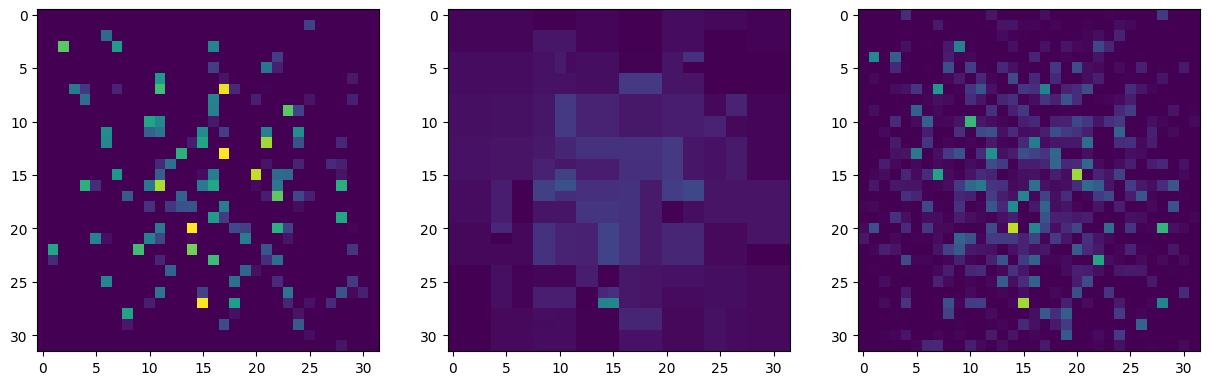

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

vmax = 1.1 * float(x.max())

plot_emission_field_tensor(ax=ax1, emission_field=x_rec, vmax=vmax)
plot_emission_field_tensor(ax=ax2, emission_field=x_rec_dwt, vmax=vmax)
plot_emission_field_tensor(ax=ax3, emission_field=x, vmax=vmax)

# Results from Benjis Matlab Code

## From info.txt
The l2 reconstruction error using sparse reconstruction is 1.394936

The l2 reconstruction error using sparse DWT reconstruction is 0.841298

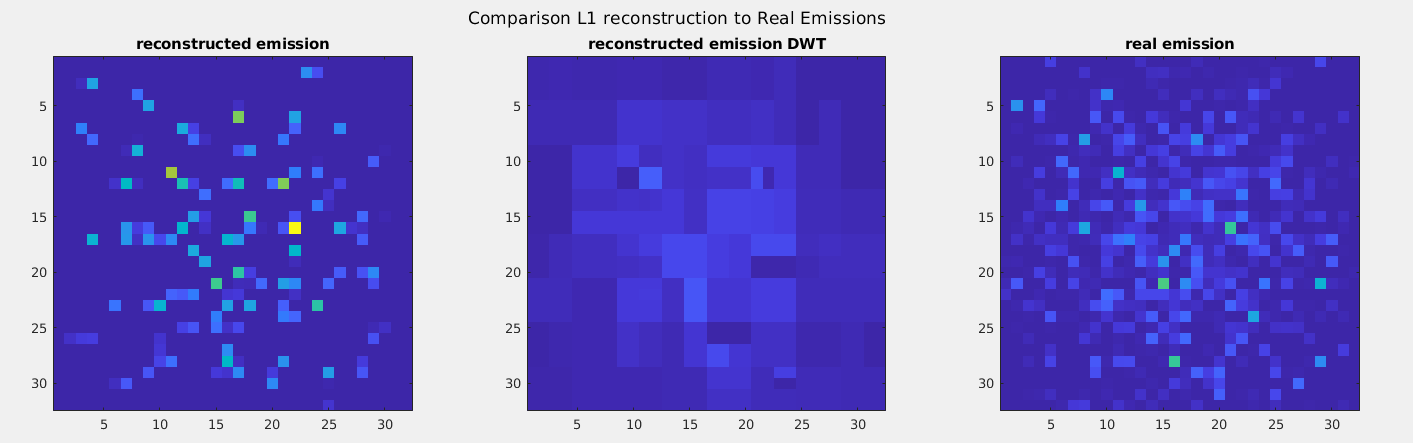

In [73]:
Image(filename=path_to_data / "benjis_plot.png")